# A1 Monte-Carlo-Integration

In [19]:
import numpy as np
from scipy.special import gamma
import matplotlib.pyplot as plt
from functools import partial

## a)

In [20]:
def simpleMCIntegrator(func, upper, lower, num, dim, rngFunc, **kwargs):
    samples = rngFunc(low=lower, high=upper, size=(num, dim))
    return (upper - lower) ** dim * np.mean(func(samples, **kwargs))


def realVolume(dim, radius=1):
    return np.pi ** (dim / 2) / gamma(dim / 2 + 1) * radius**dim

## b)
You number of sample points should rise withe the number of dimension, because in higher dimension, it is harder to score a hit. This means we expect a lower count and therefore a bigger impact of outlier.

In [21]:
def sphere(coord, radius=1):
    return np.sum(coord**2, axis=1) <= radius**2


for dim in [3, 5, 10, 15, 20]:
    real = realVolume(dim)
    mc = simpleMCIntegrator(
        func=sphere, upper=1, lower=-1, num=int(1e7), dim=dim, rngFunc=np.random.uniform
    )
    print(f"real volume of {dim}-sphere: ", real)
    print(f"MC estimate of {dim}-sphere: ", mc)
    print(f"rel error: ", abs(real - mc) / real)

real volume of 3-sphere:  4.188790204786391
MC estimate of 3-sphere:  4.1869088
rel error:  0.00044915230756634113
real volume of 5-sphere:  5.263789013914324
MC estimate of 5-sphere:  5.2587872
rel error:  0.0009502306990462022
real volume of 10-sphere:  2.550164039877345
MC estimate of 10-sphere:  2.517504
rel error:  0.01280703490702337
real volume of 15-sphere:  0.38144328082330436
MC estimate of 15-sphere:  0.4194304
rel error:  0.09958785771427012
real volume of 20-sphere:  0.02580689139001405
MC estimate of 20-sphere:  0.1048576
rel error:  3.063162758168329


## c)
As written above, higher dimension require much more sample points, This is shown in the growing error.

## d)
While the absolute error of the mc is independent of the dimension, in this example out target value decreases with the dimension. So the "constant" error viewed relative seems to increase.

# Importance Sampling

## a)

Text(0.5, 1.0, 'Convergence of the norm')

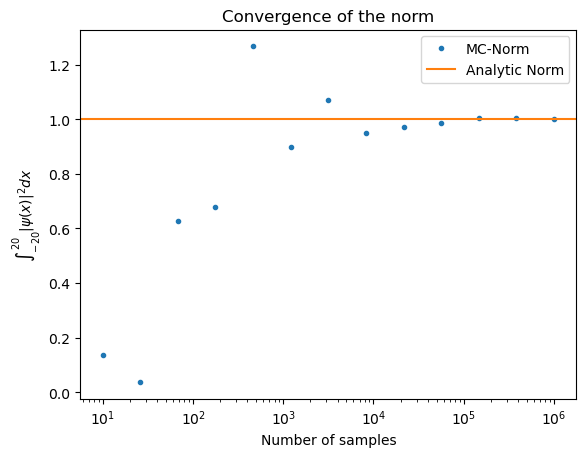

In [22]:
def schrödPDF(x):
    return (
        np.exp(-(x**2))
        * np.sin(10 * x) ** 2
        / (np.sqrt(np.pi) / 2 * (1 + np.exp(-100)))
    )


nums = np.logspace(1, 6, 13, dtype=int)
norms = []
for num in nums:  # This should be numpyfied, but the array shapes drive me crazy
    norm = simpleMCIntegrator(
        func=schrödPDF, upper=20, lower=-20, num=num, dim=1, rngFunc=np.random.uniform
    )
    norms.append(norm)


plt.plot(nums, norms, ".", label="MC-Norm")
plt.xscale("log")
plt.xlabel("Number of samples")
plt.ylabel(r"$\int_{-20}^{20}|\psi(x)|^2 dx$")
plt.axhline(1, color="tab:orange", label="Analytic Norm")
plt.legend()
plt.title("Convergence of the norm")

## b)

Text(0.5, 1.0, 'MC-Norm calculated with bounded normal distribution, $10^6$ samples')

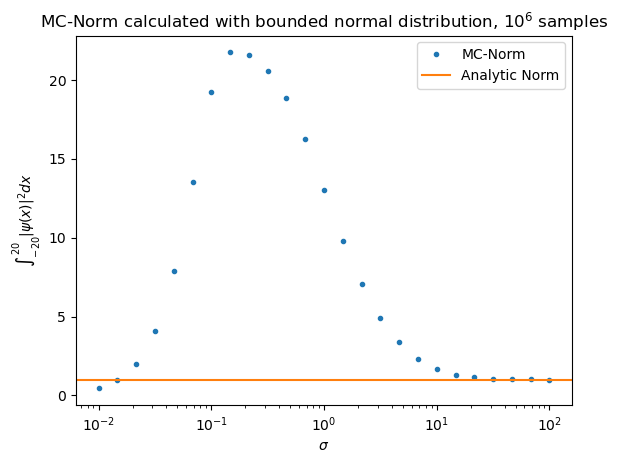

In [23]:
def boundNormal(loc, scale, low, high, size):
    values = np.zeros(size)
    redrawMask = np.ones_like(values, dtype=bool)
    percent = 1
    while np.any(redrawMask):
        num = np.sum(redrawMask)
        values[redrawMask] = np.random.normal(loc=loc, scale=scale, size=num)
        redrawMask = (values < low) | (values > high)

    return values


sigmas = np.logspace(-2, 2, 25)
norms = []
for sigma in sigmas:
    norm = simpleMCIntegrator(
        func=schrödPDF,
        upper=20,
        lower=-20,
        num=int(1e6),
        dim=1,
        rngFunc=partial(boundNormal, loc=0, scale=sigma, low=-20, high=20),
    )
    norms.append(norm)

plt.plot(sigmas, norms, ".", label="MC-Norm")
plt.xscale("log")
plt.xlabel(r"$\sigma$")
plt.ylabel(r"$\int_{-20}^{20}|\psi(x)|^2 dx$")
plt.axhline(1, color="tab:orange", label="Analytic Norm")
plt.legend()
plt.title("MC-Norm calculated with bounded normal distribution, $10^6$ samples")